# TP 3 - Visión por Computadora

## Integrantes
* Hagata, Juan Pablo
* Sossa, Fabian
* Juárez Yélamos, Fausto 

## Carga de datos

In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Faust\anaconda3\envs\CV1\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Faust\anaconda3\envs\CV1\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Faust\anaconda3\envs\CV1\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\Fa

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [22]:
img_path = [
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/COCA-COLA-LOGO.jpg?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/coca_logo_1.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/coca_logo_2.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/coca_multi.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/coca_retro_1.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/coca_retro_2.png?raw=true',
    'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/images/logo_1.png?raw=true'
]

template_path = 'https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I/blob/16-cohorte/Material_TPs/TP3/template/pattern.png?raw=true'



In [ ]:
def load_image(image_path):
    #return cv2.imread(image_path)
    # Hacer una solicitud GET a la URL
    response = requests.get(image_path)

    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la imagen en un array NumPy
        image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

        # Leer la imagen usando OpenCV
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        print(image.shape)
        return image
    else:
        print("Error al descargar la imagen.")


## Funciones de procesamiento

In [23]:
def preprocess_image(image):
    # Convertir la imagen de BGR a escala de grises
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aumentar contraste usando CLAHE (Histograma Adaptativo)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Aplicar CLAHE a la imagen en escala de grises
    img_clahe = clahe.apply(img_gray)

    return img_clahe

def apply_gaussian_blur(image):
    return cv2.GaussianBlur(image, (3, 3), 0)

def resize_template(template, scale_factor):
    width = int(template.shape[1] * scale_factor)
    height = int(template.shape[0] * scale_factor)
    return cv2.resize(template, (width, height))

def apply_canny(image):
    return cv2.Canny(image, threshold1=200, threshold2=300)
    #return cv2.Laplacian(image,cv2.CV_64F)


def invertir_imagen(image):
    return 255 - image

def apply_threshold(arr):
    arr[arr > 210] = 255
    arr[arr <= 210] = 0
    return arr


In [24]:
# Cargamos todas las imagenes y el template
img = [load_image(path) for path in img_path]
template = load_image(template_path)

(1389, 1389, 3)
(500, 207, 3)
(363, 233, 3)
(598, 799, 3)
(493, 715, 3)
(429, 715, 3)
(450, 687, 3)
(175, 400, 3)


In [25]:
# Pre-procesamiento de las imagenes
img_proc = [preprocess_image(image) for image in img]
img_proc = [apply_gaussian_blur(image) for image in img_proc]

# Aca usabamos Canny pero al ser logos con mucha superficie, matchear por bordes no era eficiente para algunas imagenes
#img_proc = [apply_canny(image) for image in img_proc]

# Lo reemplazamos por un threshold para los valores de brillo de la imagen
img_proc = [apply_threshold(image) for image in img_proc]

# En el caso de las imagenes con el logo en negro (solo la 4ta en este caso) les invertimos el color
# Suponemos que usando este metodo, deberian ser datos conocidos los formatos de las imagenes
img_proc[1] = apply_canny(img_proc[1])
img_proc[3] = apply_canny(img_proc[3])
img_proc[4] = invertir_imagen(img_proc[4])
img_proc[5] = apply_canny(img_proc[5])

# Aplicamos los filtros para el template
template_proc = preprocess_image(template)
template_proc = apply_gaussian_blur(template_proc)
template_proc = invertir_imagen(template_proc)


## Casos de estudio

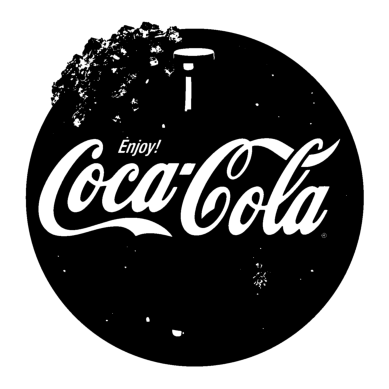

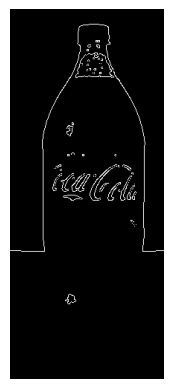

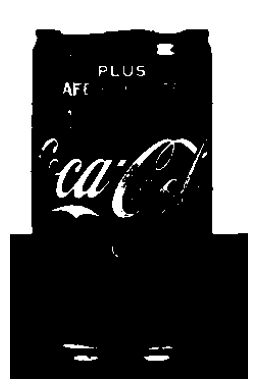

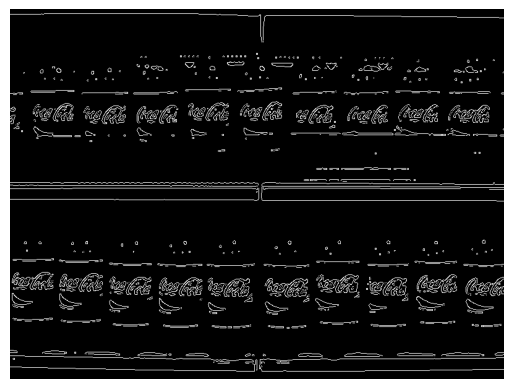

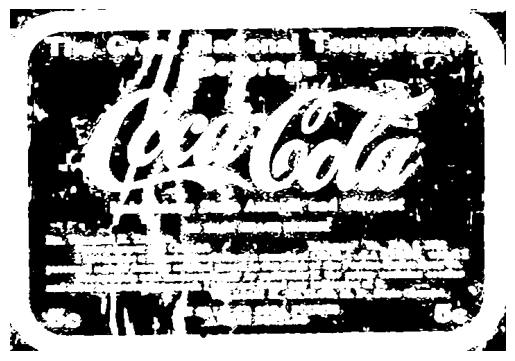

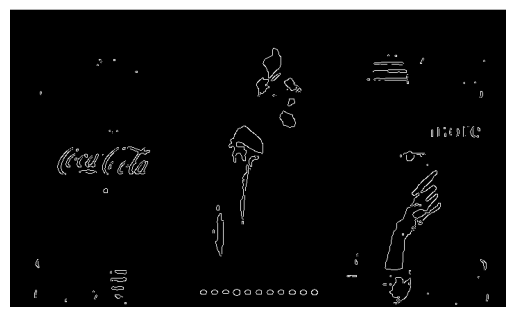

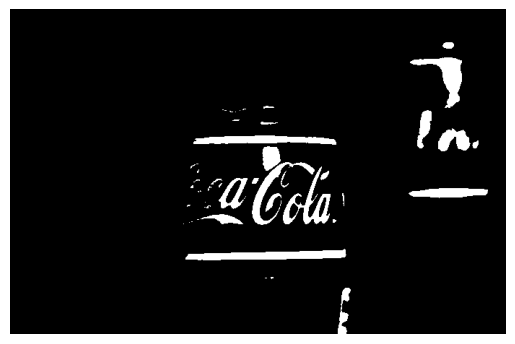

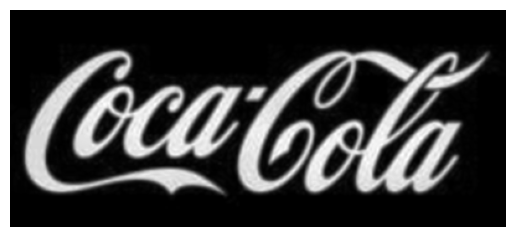

In [26]:
# Muestro las imágenes y el template

def mostrar_casos_de_estudio(img_proc):
  for image in img_proc:
      plt.imshow(image, cmap="gray")
      plt.axis('off')
      plt.show()

  plt.imshow(template_proc, cmap="gray")
  plt.axis('off')
  plt.show()

# Descomentar esta linea para ver las imagenes
mostrar_casos_de_estudio(img_proc)


## Algoritmo de detección

In [27]:
# Definimos una lista de tamaños predefinidos de template a matchear.
# Usando el metodo de variar el tamaño del template para un rango amplio de casos
# y luego filtrar por la correlacion, da resultados erroneos en varios casos.
# Probamos con todos los metodos disponibles de matcheo, y son efectivos para
# ditintos casos de estudio, pero no hay uno que funcione para todos.

list_escalas_predeterminadas = [
    'large',
    'large',
    'large',
    'small',
    'large',
    'mid',
    'mid',
]

# Genero la escala para las imagenes dependiendo del tag
def escala_template(ancho_imagen, escala_logo, ancho_template):
    escala = 0.15 if escala_logo == 'small' else 0.3 if escala_logo == 'mid' else 0.9
    return ancho_imagen*escala/ancho_template

In [28]:
def procesar_imagen(list_img, idx_img, template, escala, img_aux=None, show_greenbox=False, show_result=False):

    #escala = escala_template(list_img[idx_img].shape[1], list_escalas[idx_img], template.shape[1])

    if len(template)*escala > list_img[idx_img].shape[1]: return None

    resized_template = resize_template(template, escala)

    try:
        result = cv2.matchTemplate(list_img[idx_img], resized_template, cv2.TM_CCORR_NORMED)
        #result = cv2.matchTemplate(img_proc[idx], resized_template, cv2.TM_CCOEFF)
        #result = cv2.matchTemplate(img_proc[idx], resized_template, cv2.TM_CCORR)
    except Exception as e: return None

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    top_left = max_loc
    h, w = resized_template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    if img_aux is None:
      img_aux = img[idx_img].copy()
    cv2.rectangle(img_aux, top_left, bottom_right, (0, 255, 0), 2)

    img_rgb = cv2.cvtColor(img_aux, cv2.COLOR_BGR2RGB)

    if show_result:
        plt.imshow(result, cmap='gray')
        plt.axis('off')
        plt.show()

    if show_greenbox:
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

    return max_val, (top_left, bottom_right), img_rgb



## Detección en múltiples imágenes

==================Imagen 0==================


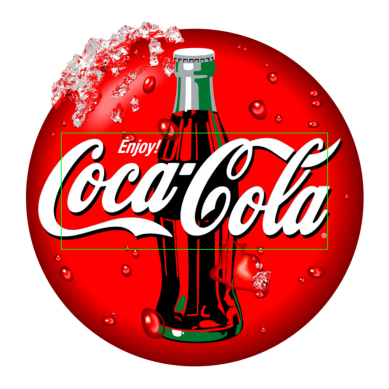

Cov. score: 0.4765838086605072.


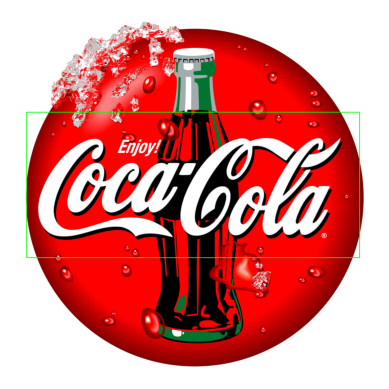

Cov. score: 0.7917115092277527.
Best score: 0.7917115092277527.
==================Imagen 1==================


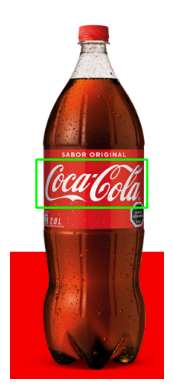

Cov. score: 0.3020385205745697.


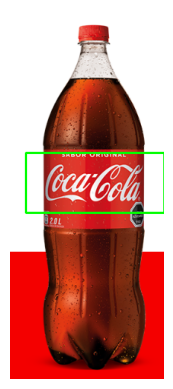

Cov. score: 0.3111107051372528.
Best score: 0.3111107051372528.
==================Imagen 2==================


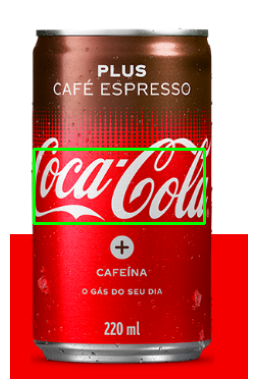

Cov. score: 0.336174339056015.


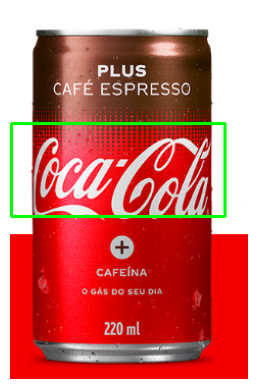

Cov. score: 0.2853248119354248.
Best score: 0.336174339056015.
==================Imagen 3==================


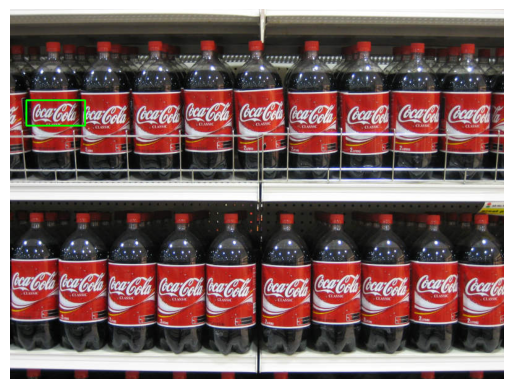

Cov. score: 0.39756929874420166.


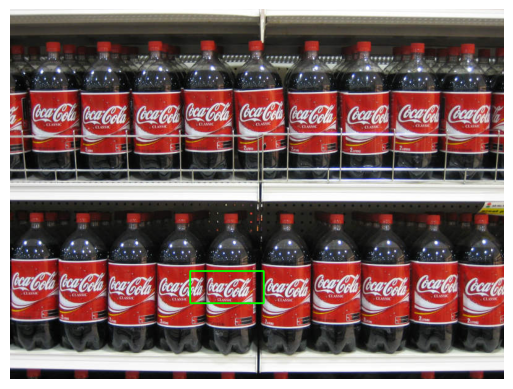

Cov. score: 0.3389214873313904.


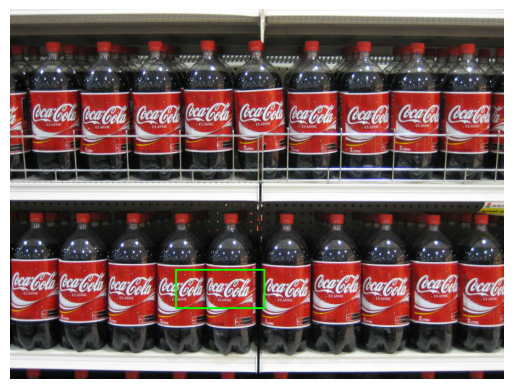

Cov. score: 0.31689536571502686.
Best score: 0.39756929874420166.
==================Imagen 4==================


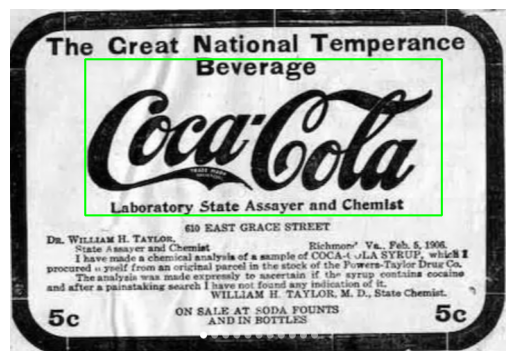

Cov. score: 0.6369582414627075.


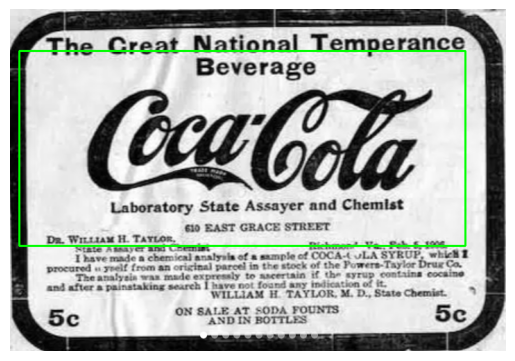

Cov. score: 0.5010421276092529.
Best score: 0.6369582414627075.
==================Imagen 5==================


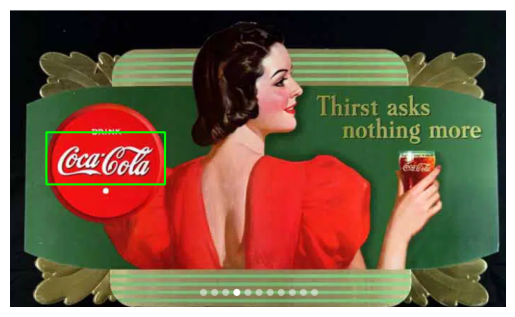

Cov. score: 0.32702162861824036.


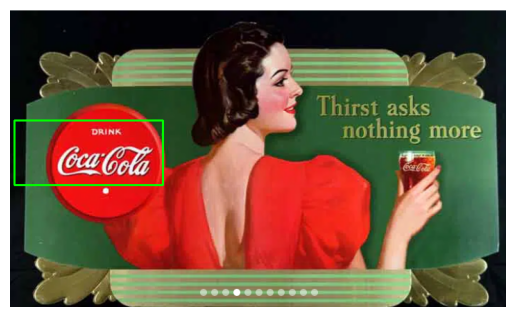

Cov. score: 0.2516757547855377.


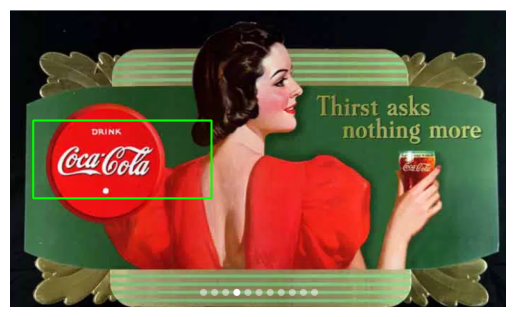

Cov. score: 0.2234927862882614.
Best score: 0.32702162861824036.
==================Imagen 6==================


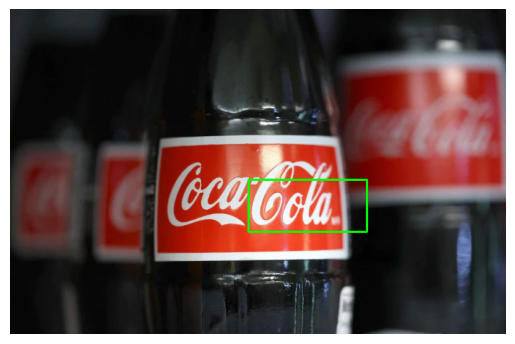

Cov. score: 0.461093932390213.


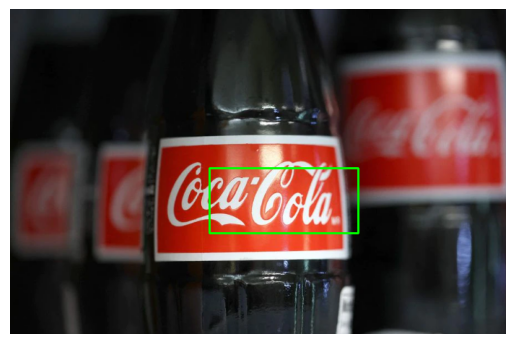

Cov. score: 0.4219296872615814.


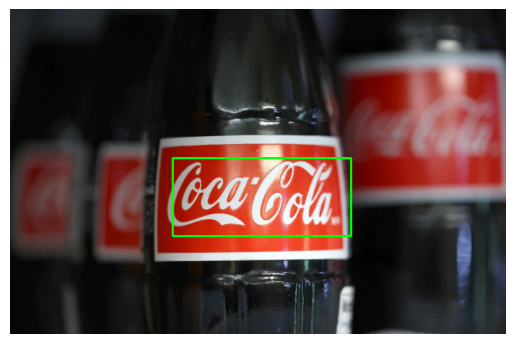

Cov. score: 0.40238484740257263.
Best score: 0.461093932390213.


In [29]:
for i in range(len(img_proc)):
    print(f"==================Imagen {i}==================")
    cov_score = []
    for j in [0.8, 1, 1.2]:
      escala = j*escala_template(img_proc[i].shape[1], list_escalas_predeterminadas[i], template.shape[1])
      res = procesar_imagen(img_proc, i, template_proc, escala, show_greenbox=True, show_result=False)
      if res is not None:
        cov_score.append(res[0])
        print(f"Cov. score: {res[0]}.")
    print(f"Best score: {max(cov_score)}.")


## Detección de multiples resultados en ```coca_multi.png```


0.3389214873313904
0.3379175364971161
0.3372458815574646
0.33562788367271423
0.33091971278190613
0.32619813084602356
0.32415929436683655
0.32235175371170044
0.3108539283275604
0.309893935918808
0.3044961988925934


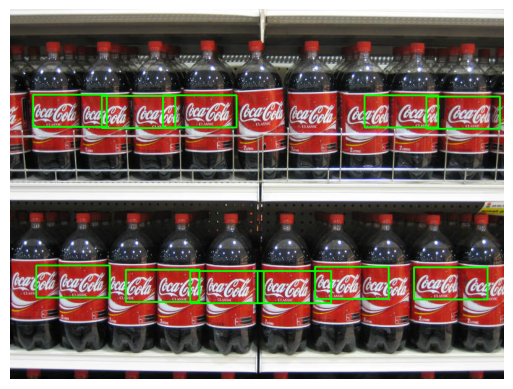

In [30]:
img_aux = None
escala = escala_template(img_proc[3].shape[1], list_escalas_predeterminadas[3], template.shape[1])

for i in range(11):
    max_cov, (top_left, bottom_right), img_aux = procesar_imagen(img_proc, 3, template_proc, escala, img_aux=img_aux)#, show_greenbox=True)
    img_proc[3][top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0
    print(max_cov)

plt.imshow(img_aux)
plt.axis('off')
plt.show()

